In [1]:
import pandas as pd
import joblib


In [2]:
df = pd.read_csv("train.csv")

In [ ]:
# # from ydata_profiling import ProfileReport
# # profile = ProfileReport(df)
# # profile.to_file("EDA_Report.html")


# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, minimal=True)
# profile.to_file("EDA_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Count'>

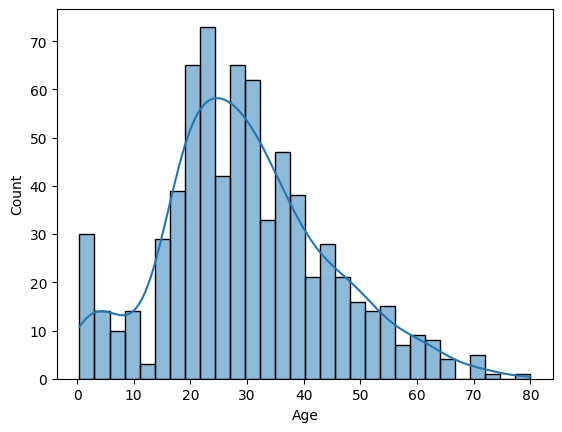

In [33]:
# df.info()
# df.info(memory_usage='deep')
# df.describe()
# df.isnull().sum()
import seaborn as sns
# sns.histplot(df['Age'])
sns.histplot(df['Age'], bins=30, kde=True)


<Axes: xlabel='Pclass', ylabel='Fare'>

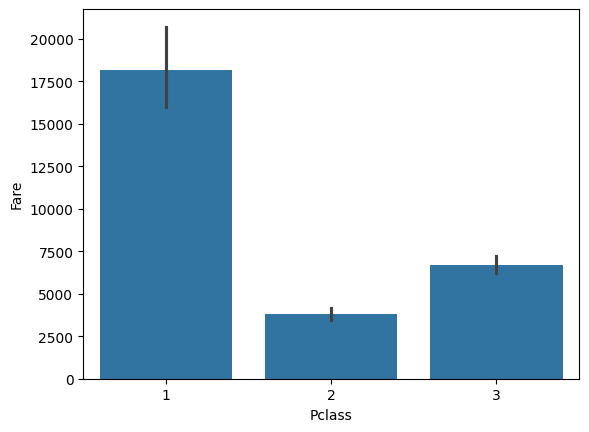

In [48]:
sns.barplot(x='Pclass', y='Fare', data=df, estimator=sum)


In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

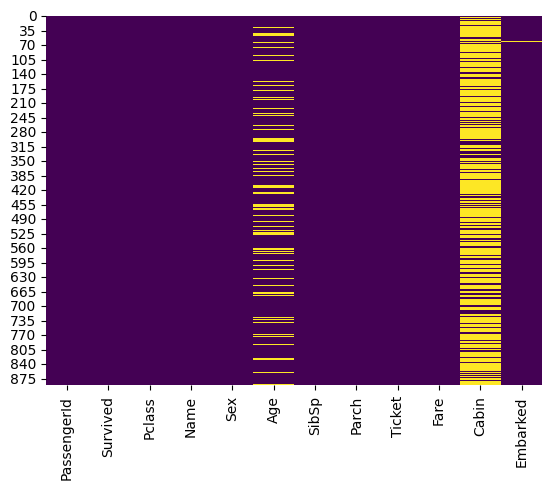

In [28]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df['Fare'].value_counts().sort_index()


Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64

In [4]:
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number])
skew_values = numeric_cols.skew()
print(skew_values)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


In [11]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["CabinDeck"] = df["Cabin"].apply(lambda x: x[0] if x != "Unknown" else "Unknown")
df["CabinDeck"].unique()
df["Cabin"] != "Unknown" # agr unknonw k braber nh hy tu wo true hoga
df["HasCabin"] = (df["Cabin"] != "Unknown").astype(int)

# Handled missing value age, Embarked and cabins
df["Sex_mapped"] = df["Sex"].map({"male": 0, "female": 1})
print(df["Sex_mapped"])
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1


# 1) extract Title (text before the dot, after a space)
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
# 2) standardize some titles
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})
# 3) group rare titles into 'Rare'
rare_titles = ['Dr','Rev','Col','Major','Capt','Lady','Sir','Don','Dona','Countess','Jonkheer','the Countess']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)


# now you can inspect unique titles and survival rates
print(df['Title'].unique())
print(df.groupby('Title')['Survived'].mean().sort_values(ascending=False))

df = pd.get_dummies(df, columns=['Title'], drop_first=True)


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_mapped, Length: 891, dtype: int64
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64


In [13]:
# First create dummy variables for categorical columns
df = pd.get_dummies(df, columns=['Embarked', 'CabinDeck'], drop_first=False)

# Convert data types
df["Pclass"] = df["Pclass"].astype("category")
df["HasCabin"] = df["HasCabin"].astype("int64")

# Convert all boolean columns to int64 at once
bool_cols = df.select_dtypes(include=["bool"]).columns
if len(bool_cols) > 0:
    df[bool_cols] = df[bool_cols].astype("int64")

In [14]:
# print(df.info())
# df.isnull().sum()
# df.describe()
# df.shape
# df.duplicated().sum()
# df[df.duplicated()]
# dupes = df[df.duplicated(keep=False)]  # show all duplicates, not just first
# print(dupes.head(20))



In [15]:
df = df.drop(columns=['Name'])
df = df.drop(columns=['PassengerId'])
df = df.drop(columns=['Cabin'])
df = df.drop(columns=['Ticket'])
df = df.drop(columns=['Sex'])
# print(df.columns.value_counts())


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])
# df["Fare"]

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8268156424581006
Precision: 0.8064516129032258
Recall: 0.7246376811594203
F1 Score: 0.7633587786259542


In [20]:
import json

metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1
}

with open("metrics.json", "w") as f:
    json.dump(metrics, f)


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[98 12]
 [19 50]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [22]:
import joblib
joblib.dump(model, "titanic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [23]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load your trained model
model = joblib.load("titanic_model.pkl")
scaler = joblib.load("scaler.pkl")


In [25]:
example = {
    'Pclass': 3,
    'Age': 18,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 200.25,
    'HasCabin': 0,
    'Sex_mapped': 1,   # 1 = male, 0 = female (example)
    'FamilySize': 1,
    'IsAlone': 0,
    'Title_Miss': 1,
    'Title_Mr': 0,
    'Title_Mrs': 0,
    'Title_Rare': 0,
    'Embarked_C': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1,
    'CabinDeck_A': 1,
    'CabinDeck_B': 0,
    'CabinDeck_C': 0,
    'CabinDeck_D': 0,
    'CabinDeck_E': 0,
    'CabinDeck_F': 0,
    'CabinDeck_G': 0,
    'CabinDeck_T': 0,
    'CabinDeck_Unknown': 0
}
# Convert into DataFrame
X_new = pd.DataFrame([example])

# Ensure same column order as training
X_new = X_new[model.feature_names_in_]

X_new[['Age', 'Fare']] = scaler.transform(X_new[['Age', 'Fare']])


# Predict
pred_class = model.predict(X_new)[0]
pred_prob  = model.predict_proba(X_new)[0]

print("Predicted class:", pred_class)   # 0 = did not survive, 1 = survived
print("Predicted probabilities:", pred_prob)

Predicted class: 1
Predicted probabilities: [0.16985145 0.83014855]
